# Data exploration

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/home/alinemati/Yandex.Disk/Nirvana/database/spotify.csv",index_col=[0])

In [3]:
df.head(2)

,song_1,song_2,song_3,song_4,song_5,song_6,song_7,song_8,song_9,song_10,...,song_4991,song_4992,song_4993,song_4994,song_4995,song_4996,song_4997,song_4998,song_4999,song_5000
user_1,2,2,8,8,13,1,4,9,1,2,...,14,2,14,1,9,0,11,6,14,7
user_2,13,5,5,5,12,8,10,10,2,2,...,10,6,11,1,1,5,12,8,3,0


In [4]:
print("Number of users:",len(df))
print("Number of songs:",len(df.columns))

Number of users: 1000
Number of songs: 5000


In [5]:
# From dataframe to numpy array
X = df.iloc[:,:].values

In [6]:
X.shape

(1000, 5000)

In [7]:
X

array([[ 2,  2,  8, ...,  6, 14,  7],
       [13,  5,  5, ...,  8,  3,  0],
       [ 3,  9,  2, ...,  5,  0, 14],
       ...,
       [ 6,  2,  1, ..., 13,  6, 13],
       [ 7,  0,  8, ..., 11,  9, 12],
       [ 6, 15,  0, ..., 15,  4,  5]])

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.datasets import make_multilabel_classification
# This produces a feature matrix of token counts, similar to what
# CountVectorizer would produce on text.
X, _ = make_multilabel_classification(random_state=0)
lda = LatentDirichletAllocation(n_components=5,
    random_state=0)
lda.fit(X) 

# get topics for some given samples:
lda.transform(X[-2:])

# NMF

In [12]:
# LDA, SVD

In [8]:
# Decompose user-song matrix into user matrix and song matrix
# n_components = n --> dimension in which we want to decompose out user-music matrix
# X = 1000*5000.  n_components=n=100,  user_matrix=1000*100. song_matrix=100*5000
# max_iter=? --> W and H --> might need to play with this
from sklearn.decomposition import NMF
nmf = NMF(n_components=100, max_iter=50, random_state=0)
nmf.fit(X)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=50,
    n_components=100, random_state=0, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [9]:
# Printing user matrix
user_matrix = nmf.transform(X)  # transforming user-song matrix : return= user_matrix
user_matrix.shape

(1000, 100)

In [10]:
# print user_matrix
user_matrix

array([[1.69203641, 0.06063321, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.23696933, 0.        , 0.05975581, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.2008759 , 0.        ,
        0.36783002],
       [0.        , 0.        , 0.23835905, ..., 4.04501876, 2.83295898,
        1.26761156],
       [0.        , 0.        , 2.95369826, ..., 0.70189368, 0.        ,
        0.30144824]])

In [11]:
# print vector for user_1
user_matrix[0]

array([1.69203641e+00, 6.06332065e-02, 0.00000000e+00, 8.13628465e-01,
       1.39890281e+00, 0.00000000e+00, 9.78953027e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.52894427e+00, 1.55913229e+00,
       0.00000000e+00, 1.23133122e+00, 1.29119922e-01, 2.67213682e-03,
       1.04063989e-01, 0.00000000e+00, 1.94633651e+00, 0.00000000e+00,
       1.97875532e+00, 0.00000000e+00, 2.54497254e+00, 1.00914138e+00,
       0.00000000e+00, 2.40786219e+00, 0.00000000e+00, 2.02945799e+00,
       0.00000000e+00, 1.03086289e-01, 3.37495589e+00, 1.83250348e+00,
       2.61682332e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.31686358e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.42039683e-01,
       0.00000000e+00, 0.00000000e+00, 1.18281146e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [12]:
# print vector for user_2
user_matrix[1]

array([0.        , 0.        , 0.        , 0.        , 2.5900904 ,
       0.89931804, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.46658256, 0.        , 0.        , 0.90379695, 0.        ,
       0.        , 0.        , 1.97269063, 0.        , 0.16592362,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01051949, 0.        , 0.        , 0.        , 2.06240561,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.22414389, 0.        , 2.44007487,
       0.        , 2.45537311, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 2.23303095,
       0.        , 0.        , 0.        , 0.        , 4.43233486,
       0.        , 0.        , 0.64932354, 0.        , 0.        ,
       0.        , 0.61429491, 0.        , 0.        , 0.        ,
       4.61346812, 0.        , 0.04638268, 3.80025705, 1.63313

In [18]:
# Printing song matrix
song_matrix = nmf.components_

In [19]:
song_matrix.shape

(100, 5000)

In [22]:
# print song_matrix
song_matrix = song_matrix.T
song_matrix

array([[0.09111663, 0.04599194, 0.35443294, ..., 0.33335427, 0.        ,
        0.        ],
       [0.17234709, 0.09042347, 0.04767831, ..., 0.16380215, 0.16382856,
        0.18483858],
       [0.34858481, 0.14847774, 0.46616122, ..., 0.        , 0.17891825,
        0.12377252],
       ...,
       [0.03672748, 0.13177138, 0.4128003 , ..., 0.07299475, 0.18730326,
        0.06243832],
       [0.29720103, 0.        , 0.30755414, ..., 0.36621594, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.29195844, 0.09004042,
        0.        ]])

In [13]:
import numpy as np
X_ = np.array([[1, 1], [2, 1], [3, 1.2], [4, 1], [5, 0.8], [6, 1]])
from sklearn.decomposition import NMF
model = NMF(n_components=2, init='random', random_state=0)
W = model.fit_transform(X)
H = model.components_

In [15]:
H

array([[1.43271412, 3.11909926, 2.17613752, ..., 2.84423485, 2.40946773,
        2.49793986],
       [2.56482291, 0.67835923, 1.81038509, ..., 0.86644628, 1.39466836,
        1.4028152 ]])

In [23]:
# print vector for song_1
song_matrix[0]

array([0.09111663, 0.04599194, 0.35443294, 0.01807336, 0.45481454,
       0.11030071, 0.32513138, 0.19201386, 0.        , 0.        ,
       0.        , 0.04944819, 0.        , 0.16101387, 0.24073442,
       0.00075456, 0.32126061, 0.16954543, 0.59656673, 0.15765228,
       0.        , 0.27756209, 0.23416498, 0.67352397, 0.15266384,
       0.07948341, 0.41218156, 0.35904213, 0.        , 0.07746489,
       0.        , 0.15683347, 0.31546909, 0.54044087, 0.600034  ,
       0.        , 0.07490113, 0.        , 0.4777501 , 0.01566104,
       0.07449975, 0.05281405, 0.24060034, 0.        , 0.11226024,
       0.19434375, 0.04902285, 0.27219489, 0.        , 0.26689516,
       0.16798946, 0.21919109, 0.        , 0.22416773, 0.41715261,
       0.37122647, 0.24377222, 0.1367834 , 0.17828258, 0.25532256,
       0.2326439 , 0.32253227, 0.07180034, 0.32369538, 0.19685513,
       0.34265043, 0.32995926, 0.17779524, 0.40626328, 0.23163461,
       0.23674054, 0.00592745, 0.37343888, 0.4582898 , 0.41735

In [24]:
# print vector for song_2
song_matrix[1]

array([0.17234709, 0.09042347, 0.04767831, 0.17444109, 0.        ,
       0.70436605, 0.        , 0.3449805 , 0.28226   , 0.34635623,
       0.06611348, 0.23416618, 0.13185387, 0.3790926 , 0.        ,
       0.68052395, 0.        , 0.54798491, 0.        , 0.        ,
       0.15220749, 0.        , 0.44860918, 0.16849852, 0.        ,
       0.        , 0.51611823, 0.        , 0.13102265, 0.08208107,
       0.        , 0.17885924, 0.13627953, 0.        , 0.        ,
       0.        , 0.32961154, 0.10498143, 0.37590898, 0.13258424,
       0.36233914, 0.01166212, 0.39610815, 0.        , 0.07254827,
       0.        , 0.30195772, 0.18158967, 0.31621634, 0.075405  ,
       0.27148074, 0.04279433, 0.77687622, 0.0579463 , 0.30823177,
       0.        , 0.37141971, 0.56951789, 0.12098945, 0.25078004,
       0.68366096, 0.07760711, 0.        , 0.23933373, 0.28179949,
       0.17794485, 0.13542369, 0.16990326, 0.26622262, 0.        ,
       0.06128722, 0.27221483, 0.43348063, 0.        , 0.12907

# Recommendation

In [25]:
user_matrix # 1000*100

array([[1.69203641, 0.06063321, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.23696933, 0.        , 0.05975581, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.2008759 , 0.        ,
        0.36783002],
       [0.        , 0.        , 0.23835905, ..., 4.04501876, 2.83295898,
        1.26761156],
       [0.        , 0.        , 2.95369826, ..., 0.70189368, 0.        ,
        0.30144824]])

In [26]:
song_matrix #5000*100

array([[0.09111663, 0.04599194, 0.35443294, ..., 0.33335427, 0.        ,
        0.        ],
       [0.17234709, 0.09042347, 0.04767831, ..., 0.16380215, 0.16382856,
        0.18483858],
       [0.34858481, 0.14847774, 0.46616122, ..., 0.        , 0.17891825,
        0.12377252],
       ...,
       [0.03672748, 0.13177138, 0.4128003 , ..., 0.07299475, 0.18730326,
        0.06243832],
       [0.29720103, 0.        , 0.30755414, ..., 0.36621594, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.29195844, 0.09004042,
        0.        ]])

In [28]:
# We have user_matrix and song_matrix
# Let's say we want to recommend some songs to user_1
# step1: we need to find euclidian distance between user_1 to all the other users
# step2: Find 5 closest user
# step3: Find the songs what these 5 closest users are listening
# step4: Recommend those songs to user_1

In [16]:
# prerequisite: euclidian_distance function
def euclidian_distance(v1,v2):
    return pow(sum([pow(v1[idx]-v2[idx],2) for idx in range(len(v1))]),0.5)

euclidian_distance([1,1],[1,1])

0.0

In [17]:
# we want to recommend songs to user1
user1_vec = user_matrix[0]
user2_vec = user_matrix[1]
print(euclidian_distance(user1_vec,user2_vec))

12.682546952085854


In [18]:
user3_vec = user_matrix[2]
print(euclidian_distance(user1_vec,user3_vec))

12.074322380443364


In [19]:

eucli_distances = []
for idx in range(1000):
    other_user = user_matrix[idx]
    eu = euclidian_distance(user1_vec,other_user)
    eucli_distances.append(eu)

In [20]:
len(eucli_distances)

1000

In [21]:
# step2: Find 5 closest user
import numpy as np
candidate_index = np.argsort(eucli_distances)
# First candidate who is closer to user 1 --> index 0
# Second candidate who is closer to user 1 --> index 352
# Third candidate who is closer to user 1 --> index 737

In [22]:
# top 5 users closer to user_1
candidate_index[0:6]

array([  0, 352, 737, 284, 501, 609])

In [23]:
# step3: Find the songs what these 5 closest users are listening
# @index 0 what user is present --> user 1
# @index 352 what user is present --> user_353

In [24]:
# df.iloc[353]

In [25]:
# step1: we need to find euclidian distance between user_1 to all the other users
import sys
eucli_distances = []   # define a list in order to maintain distance entry between user_1 to all other user 
user1_idx = 0           # index of the user_1 in user_matrix
counter = 0            # define a variable to track user_ids
for other_user in user_matrix[:]:
    if user1_idx==counter:
        # you need not compare user_1 vector to user_1 vector
        eucli_distances.append(sys.float_info.max)
    else:
        user1 = user_matrix[0]   # find user_1 vector
        dist_ = euclidian_distance(user1,other_user)
        eucli_distances.append(dist_)
    counter+=1

In [26]:
# print euclidian distance between first user to 5 other users
eucli_distances[0:5]

[1.7976931348623157e+308,
 12.682546952085854,
 12.074322380443364,
 11.129357457060793,
 12.736158783422908]

In [27]:
# Finding 5 closest user to user_1
import numpy as np
user_indcs_closer_to_user1 = np.argsort(eucli_distances)[:5]
user_indcs_closer_to_user1

array([352, 737, 284, 501, 609])

In [28]:
# List the songs that these closest 5 users are listening
for id_ in user_indcs_closer_to_user1:
    temp = pd.DataFrame(df.iloc[id_])
    print(temp[temp.values!=0][0:-1].index)

Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_6', 'song_7',
       'song_8', 'song_9', 'song_10',
       ...
       'song_4988', 'song_4989', 'song_4990', 'song_4991', 'song_4992',
       'song_4993', 'song_4994', 'song_4995', 'song_4996', 'song_4997'],
      dtype='object', length=4682)
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_7', 'song_8',
       'song_9', 'song_10', 'song_11',
       ...
       'song_4989', 'song_4990', 'song_4991', 'song_4992', 'song_4993',
       'song_4994', 'song_4995', 'song_4997', 'song_4998', 'song_4999'],
      dtype='object', length=4699)
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_6', 'song_7',
       'song_8', 'song_9', 'song_10',
       ...
       'song_4990', 'song_4991', 'song_4992', 'song_4993', 'song_4994',
       'song_4995', 'song_4996', 'song_4997', 'song_4998', 'song_4999'],
      dtype='object', length=4704)
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_6', 'song_7',
    

In [53]:
flash = song_matrix[1]

In [54]:
flash

array([0.17234709, 0.09042347, 0.04767831, 0.17444109, 0.        ,
       0.70436605, 0.        , 0.3449805 , 0.28226   , 0.34635623,
       0.06611348, 0.23416618, 0.13185387, 0.3790926 , 0.        ,
       0.68052395, 0.        , 0.54798491, 0.        , 0.        ,
       0.15220749, 0.        , 0.44860918, 0.16849852, 0.        ,
       0.        , 0.51611823, 0.        , 0.13102265, 0.08208107,
       0.        , 0.17885924, 0.13627953, 0.        , 0.        ,
       0.        , 0.32961154, 0.10498143, 0.37590898, 0.13258424,
       0.36233914, 0.01166212, 0.39610815, 0.        , 0.07254827,
       0.        , 0.30195772, 0.18158967, 0.31621634, 0.075405  ,
       0.27148074, 0.04279433, 0.77687622, 0.0579463 , 0.30823177,
       0.        , 0.37141971, 0.56951789, 0.12098945, 0.25078004,
       0.68366096, 0.07760711, 0.        , 0.23933373, 0.28179949,
       0.17794485, 0.13542369, 0.16990326, 0.26622262, 0.        ,
       0.06128722, 0.27221483, 0.43348063, 0.        , 0.12907

In [55]:
# after k-means
song_matrix[0:1000], song_matrix[1000:3000],song_matrix[3000:5000]
# kmeand find out to which cluster flash will be assigned
song_matrix[0:1000] # compare flash to all the songs present in this cluster
# find the k nearest neighbours

array([[0.09111663, 0.04599194, 0.35443294, ..., 0.33335427, 0.        ,
        0.        ],
       [0.17234709, 0.09042347, 0.04767831, ..., 0.16380215, 0.16382856,
        0.18483858],
       [0.34858481, 0.14847774, 0.46616122, ..., 0.        , 0.17891825,
        0.12377252],
       ...,
       [0.03672748, 0.13177138, 0.4128003 , ..., 0.07299475, 0.18730326,
        0.06243832],
       [0.29720103, 0.        , 0.30755414, ..., 0.36621594, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.29195844, 0.09004042,
        0.        ]])

# K Means

In [56]:
user_matrix.shape

(1000, 100)

In [57]:
song_matrix.shape

(5000, 100)

In [66]:
# Recommended songs -- user 1
# ['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_6', 'song_7',
#        'song_8', 'song_9', 'song_10]
# Let's say user1 started listening to 'song_1'
# 'song_1' == 'flash'

# Define number of clusters

In [67]:
# First we will make some clusters
# we will use song_matrix
k = 10
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=k)
kmeans.fit(song_matrix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# Find the cluster to which selected song will be assigned

In [68]:
# Let's find out in which cluster 'song_2' will fall
# step:1 find the vector for 'song_2'
index_in_df = list(df.columns).index('song_2')
index_in_df
song1_vec = song_matrix[index_in_df]

In [69]:
# Find the cluster in which song_1 will fall
kmeans.predict([song1_vec])

array([0], dtype=int32)

In [70]:
# song 2 has been allocated to cluser 0
# total number of clusters: 10
# selected cluster: 0

# Find all the songs present in cluster  0

In [82]:
song_matrix.shape

(5000, 100)

# PCA

In [84]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
transformed_song_matrix = pca.fit_transform(song_matrix)

In [85]:
transformed_song_matrix.shape

(5000, 2)

In [87]:
transformed_song_matrix.shape

(5000, 2)

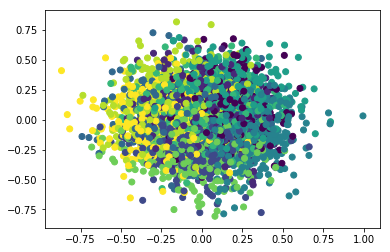

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(transformed_song_matrix[:,0],transformed_song_matrix[:,1],c=all_labels)

In [71]:
# Find all the songs present in cluster  = [0]
cluster_id = 0
all_labels = list(kmeans.predict(song_matrix))
zero_cluster_candidate_ids = [idx for idx in range(len(all_labels)) if all_labels[idx]==cluster_id]
zero_cluster_candidates = song_matrix[zero_cluster_candidate_ids]

In [72]:
zero_cluster_candidate_ids # songs corresponding to cluster: 0 

[1,
 13,
 14,
 26,
 31,
 42,
 49,
 60,
 64,
 78,
 81,
 99,
 101,
 113,
 119,
 127,
 140,
 150,
 184,
 196,
 201,
 208,
 226,
 227,
 231,
 238,
 242,
 257,
 281,
 291,
 304,
 305,
 311,
 337,
 347,
 354,
 368,
 375,
 383,
 398,
 406,
 473,
 486,
 503,
 516,
 517,
 522,
 534,
 540,
 544,
 593,
 594,
 615,
 616,
 654,
 659,
 660,
 662,
 668,
 672,
 682,
 687,
 688,
 700,
 743,
 748,
 759,
 760,
 778,
 803,
 808,
 812,
 828,
 835,
 838,
 839,
 850,
 856,
 860,
 899,
 901,
 926,
 934,
 957,
 986,
 989,
 993,
 1018,
 1019,
 1023,
 1031,
 1040,
 1042,
 1053,
 1061,
 1071,
 1080,
 1113,
 1118,
 1123,
 1131,
 1139,
 1142,
 1167,
 1179,
 1200,
 1210,
 1213,
 1226,
 1244,
 1245,
 1251,
 1252,
 1260,
 1289,
 1296,
 1297,
 1298,
 1318,
 1338,
 1339,
 1342,
 1353,
 1359,
 1374,
 1407,
 1409,
 1420,
 1424,
 1425,
 1430,
 1432,
 1439,
 1479,
 1489,
 1490,
 1537,
 1539,
 1543,
 1567,
 1575,
 1591,
 1607,
 1611,
 1613,
 1615,
 1636,
 1639,
 1640,
 1644,
 1668,
 1672,
 1676,
 1677,
 1678,
 1704,
 1713,
 

# KNN

In [74]:
# user selected song
# candidate song list

In [75]:
# Step 2: Find the closest song using NN
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors=5)
knn.fit(zero_cluster_candidates)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

In [76]:
knn.kneighbors([song_matrix[index_in_df]])

(array([[0.        , 2.00360455, 2.03952947, 2.07659209, 2.07939091]]),
 array([[  0, 215,  91,  90, 399]]))